In [1]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#분류 대상 카테고리 선택
caltech_dir = 'C:/Users/YC/Desktop/Image/train'
categories = ['Corn','Wheat']
nb_classes = len(categories)

# 이미지 크기 지정
image_w = 32
image_h = 32
pixels = image_w * image_h * 3

# 데이터 들이기
X = []
Y = []
for idx, cat in enumerate(categories):
    #라벨 지정
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    # 이미지
    image_dir = caltech_dir + '/' + cat
    files = glob.glob(image_dir+"/*.tif")
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        X.append(data)
        Y.append(label)
        
X = np.array(X)
Y = np.array(Y)

#데이터 분할(테스트 갯수 10개로 지정)
X_train, X_test, y_train, y_test = train_test_split(X,Y)
xy = (X_train, X_test, y_train, y_test)
np.save('C:/Users/YC/Desktop/Image/2obj.npy', xy)
print('전체 데이터 수 ', len(Y))
print('훈련 데이터 수 ', len(X_train))
print('테스트 데이터 수', len(X_test))

전체 데이터 수  2486
훈련 데이터 수  1864
테스트 데이터 수 622


### CNN 분류

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np

Using TensorFlow backend.
C:\Users\YC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

In [4]:
categories = ['Corn','Wheat']
nb_classes = len(categories)
# 이미지 크기 지정
image_w = 32
image_h = 32

X_train, X_test, y_train, y_test = np.load('C:/Users/YC/Desktop/Image/2obj.npy', allow_pickle=True)

# 정규화
X_train = X_train.astype('float') / 256
X_test = X_test.astype('float') / 256
print('X_train shape:', X_train.shape)

# 모델 구축
model = Sequential()
model.add(Convolution2D(32, 3,3, 
                       border_mode='same',
                       input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same',))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, batch_size=32, nb_epoch=50)

# 평가
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

X_train shape: (1864, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


Instructions for updating:
Use tf.cast instead.


C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.5798 - acc: 0.7291
Epoch 2/50
1864/1864 [==============================] - 6s 3ms/step - loss: 0.2900 - acc: 0.8948
Epoch 3/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.2012 - acc: 0.9340
Epoch 4/50
1864/1864 [==============================] - 6s 3ms/step - loss: 0.1756 - acc: 0.9340
Epoch 5/50
1864/1864 [==============================] - 6s 3ms/step - loss: 0.1668 - acc: 0.9383
Epoch 6/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.1419 - acc: 0.9490
Epoch 7/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.1463 - acc: 0.9506
Epoch 8/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.1048 - acc: 0.9576
Epoch 9/50
1864/1864 [==============================] - 6s 3ms/step - loss: 0.1191 - acc: 0.9555
Epoch 10/50
1864/1864 [==============================] - 7s 4ms/step - loss: 0.0786 - acc: 0.9694
Epoch 11/50
1864/1864 [======

#### 학습 완료 모델 저장

In [5]:
hdf5_file='C:/Users/YC/Desktop/Image/2obj-model.hdf5'
model.save_weights(hdf5_file)

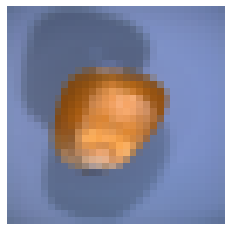

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


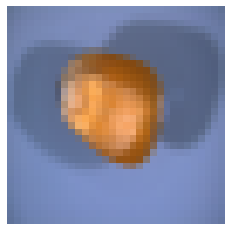

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


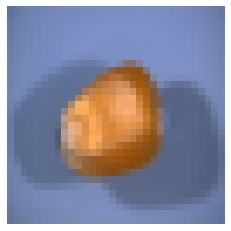

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


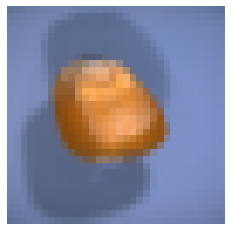

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


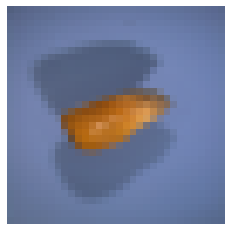

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


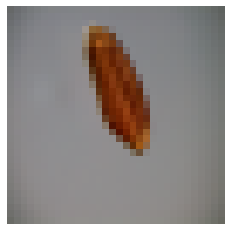

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


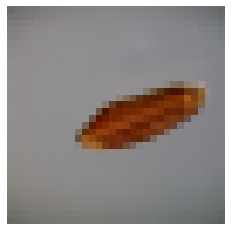

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


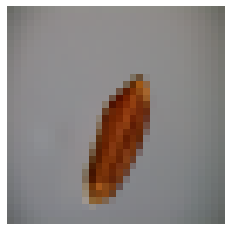

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


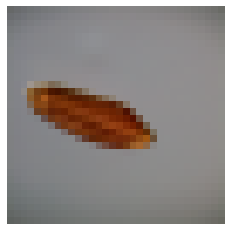

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


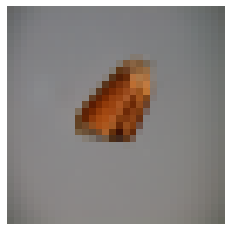

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


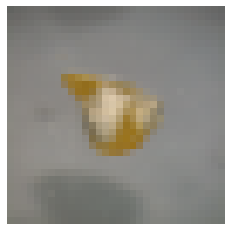

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


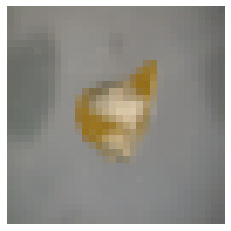

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


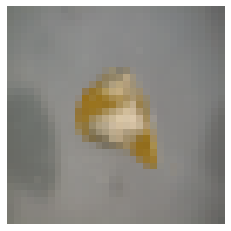

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


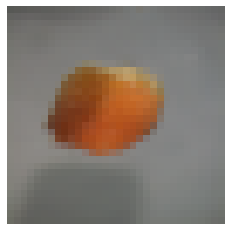

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


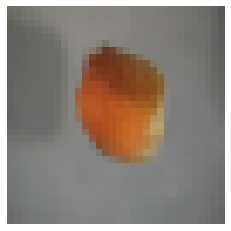

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


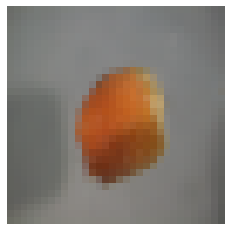

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


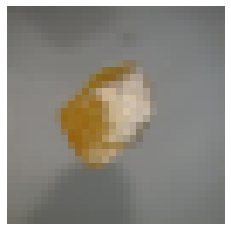

Corn = 100
Wheat = 0
----------------------------------------
예측 결과 = Corn


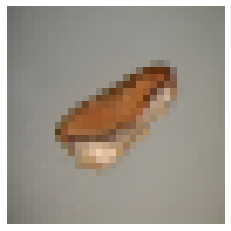

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


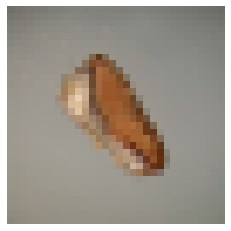

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


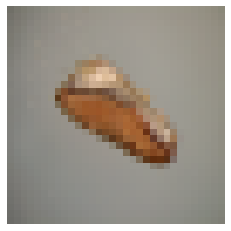

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


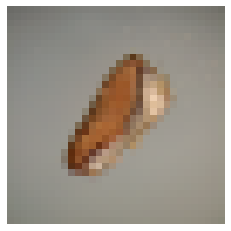

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


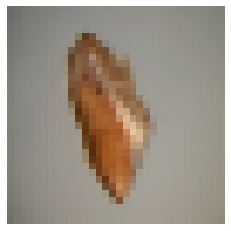

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


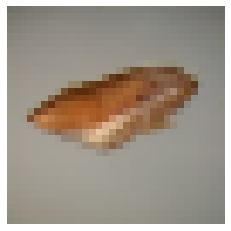

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


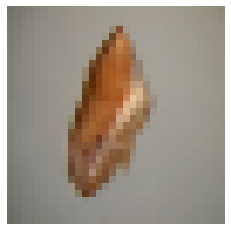

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


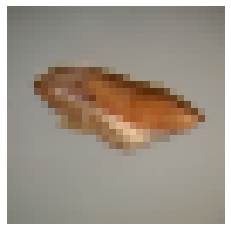

Corn = 0
Wheat = 100
----------------------------------------
예측 결과 = Wheat


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


labels=['Corn','Wheat']
im_size = 32 * 32 * 3

model.load_weights(hdf5_file)

list_im = []
predict_result = []
# def grain(i):
for i in range(1,26):
    im = cv2.imread(f'C:/Users/YC/Desktop/Image/test{i}.tif')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    list_im.append(im)
    
    plt.imshow(im)
    plt.axis('off')
    plt.show()

    r = model.predict(np.array([im]), batch_size=32)
    res = r[0]
    


    for i, acc in enumerate(res):
        print(labels[i], '=', int(acc* 100))
    print('--'*20)
    print('예측 결과 =',labels[res.argmax()])
    
    
    
    if res.argmax() == 0:
        predict_result.append('Corn')
    else:
        predict_result.append('Wheat')

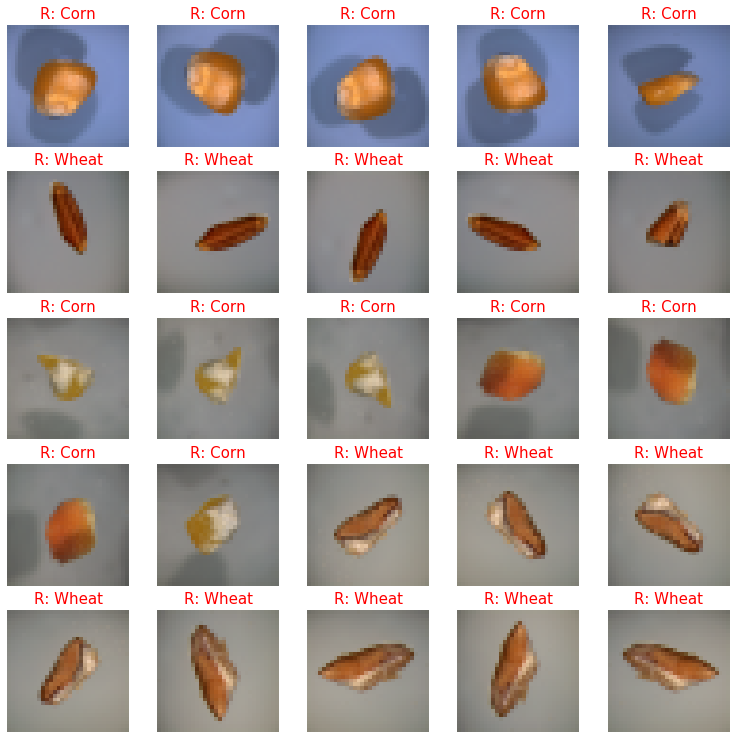

In [7]:
plt_row = 5
plt_col = 5
width = 32
height = 32

plt.rcParams["figure.figsize"] = (13,13)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(25):
    sub_plt = axarr[i//5, i%5]
    sub_plt.axis('off')
    sub_plt.imshow(list_im[i])
    sub_plt_title = 'R: ' + str(predict_result[i]) 
    sub_plt.set_title(sub_plt_title, color='red', size=15)

plt.show()
